In [50]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import xarray as xr
import os

from stompy.grid import unstructured_grid
%matplotlib inline

In [51]:
fig_dir='plots_20180307'
os.path.exists(fig_dir) or os.mkdir(fig_dir)

In [52]:
ds=xr.open_dataset('spliced_grids_01_bathy.nc')
grid_name='splice_01'
g=unstructured_grid.UnstructuredGrid.from_ugrid(ds)

In [42]:
breaks=np.array([-4000,-2000,-1000,-500,-250,-100,-40,-20,-10,-5,-2,-1])
def fwd(x):
    return -np.log10(-x.clip(-np.inf,-1))
def rev(x):
    return -10**(-x)
rev(fwd(breaks))

array([ -4.00000000e+03,  -2.00000000e+03,  -1.00000000e+03,
        -5.00000000e+02,  -2.50000000e+02,  -1.00000000e+02,
        -4.00000000e+01,  -2.00000000e+01,  -1.00000000e+01,
        -5.00000000e+00,  -2.00000000e+00,  -1.10000000e+00])

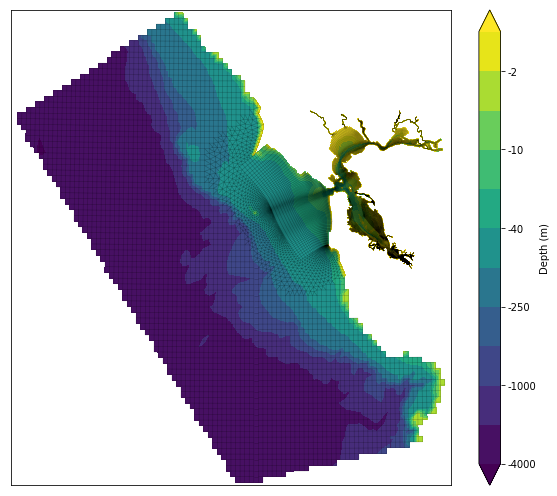

In [55]:
fig,ax=plt.subplots(figsize=(8,7))

norm=colors.LogNorm(vmin=1,vmax=4000)

cont = g.contourf_node_values(fwd(g.nodes['depth']),fwd(breaks),extend='both')
g.plot_edges(ax=ax,color='k',lw=0.5,alpha=0.3)
cbar=plt.colorbar(cont,label="Depth (m)")
ax.axis('equal')
ax.xaxis.set_visible(0)
ax.yaxis.set_visible(0)
break_sel=slice(None,None,2)
cbar.set_ticks(fwd(breaks[break_sel]))
cbar.set_ticklabels( ["%.0f"%d for d in breaks[break_sel]])
fig.tight_layout()
fig.savefig(os.path.join(fig_dir,'%s-with_bathy.png'%grid_name),dpi=150)